# GitHub Stats for FLORIS
This notebook is used to connect to the GitHub stats database for the FLORIS repo to extract and visualize data



In [1]:
# add path above this notebook
import sys
sys.path.append("..") 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dateutil

In [2]:
# import database
import database as dbc

In [3]:
# connect to the database

db = dbc.Database()

In [4]:
# retrieve data in the following range
# timestamps in format YYYY-MM-DD
from_date = '2018-01-01'
to_date = datetime.datetime.today().strftime('%Y-%m-%d') # set to today


In [5]:
print("FROM DATE: " + from_date)
print("TO DATE: " + to_date)

FROM DATE: 2018-01-01
TO DATE: 2019-01-17


In [6]:
results = db.getResults(from_date, to_date)

In [7]:
df = pd.DataFrame(results)

## Clones Graph

Text(0,0.5,'Number of Clones')

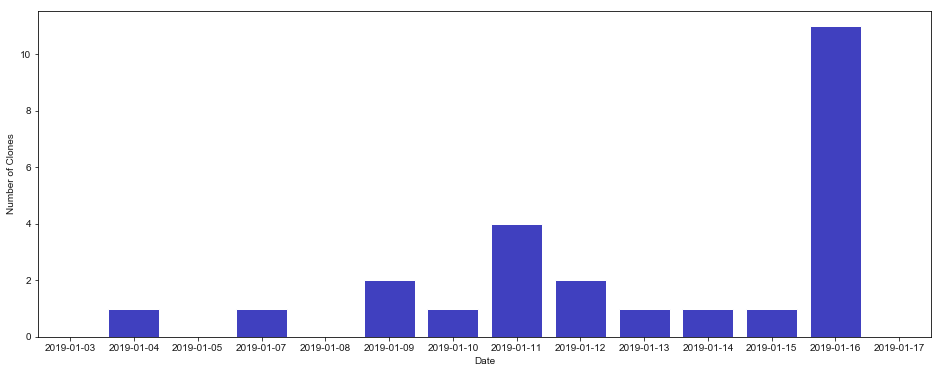

In [8]:
# set up figure
fig, ax = plt.subplots(figsize=(16,6))
sns.set(style="whitegrid")
#data = sns.load_dataset(df)
ax = sns.barplot(ax=ax, x="timestamp", y="clones_uniques", data=df, color="blue", saturation=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Clones')

# Save the figure
#fig.savefig("WHATEVER PATH YOU WANT")


DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15',
               '2019-01-16', '2019-01-17'],
              dtype='datetime64[ns]', name='timestamp', freq=None)
   timestamp  clones_total  clones_uniques  views_total  views_uniques
0 2019-01-06           1.0             1.0           21              4
1 2019-01-13          13.0            11.0          113             34
2 2019-01-20          26.0            13.0          207             32


Text(0,0.5,'Number of Unique Clones')

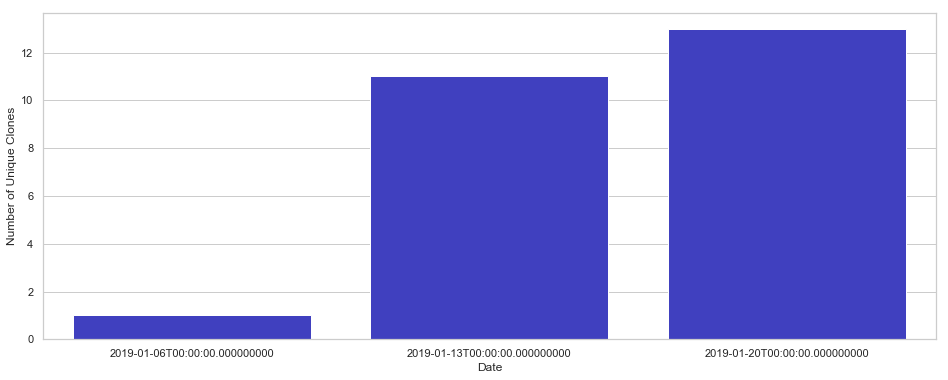

In [9]:
# better would be to show totals by month
# pandas can aggregate by month?
df2 = df
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['timestamp'] = df2["timestamp"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
df2.set_index(df2['timestamp'],inplace=True)
print(df2.index)
#clones_cnt = df2['clones_total'].resample('M').sum()
df2 = df2.groupby(pd.Grouper(freq='W')).sum().reset_index()
print(df2)

fig2, ax2 = plt.subplots(figsize=(16,6))
sns.set(style="whitegrid")
ax2 = sns.barplot(ax=ax2, x="timestamp", y="clones_uniques", data=df2, color="blue", saturation=.5)
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Unique Clones')

## TOTAL COUNTS

In [10]:
# Get total counts for all time recorded
totals = db.getTotals()
print(totals)

GETTING TOTAL UNIQUE VIEWS AND CLONES
   total_unique_clones  total_unique_views  from_date    to_date
0                   25                  70 2019-01-03 2019-01-17
